In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import copy
import math

In [5]:
# Loading data of house price from text file 
def load_house_data():
    data = np.loadtxt("/Users/nginkimlong/Documents/Document/ITC/Courses/AI/lab/Feature Scaling/houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [6]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [7]:
print(len(X_train), len(y_train))
print(X_features, "Age")
print(X_train[0], y_train[0])

99 99
['size(sqft)', 'bedrooms', 'floors', 'age'] Age
[1.244e+03 3.000e+00 1.000e+00 6.400e+01] 300.0


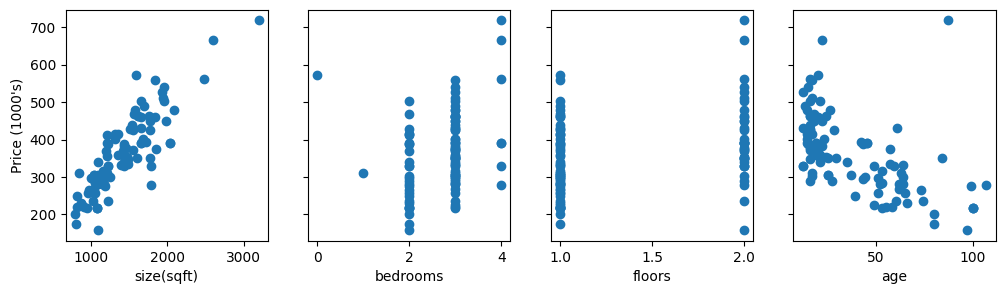

In [8]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

# Start working on model with scikit learn library
=> https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html 

In [9]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Scale the features (SGD works better with scaled features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

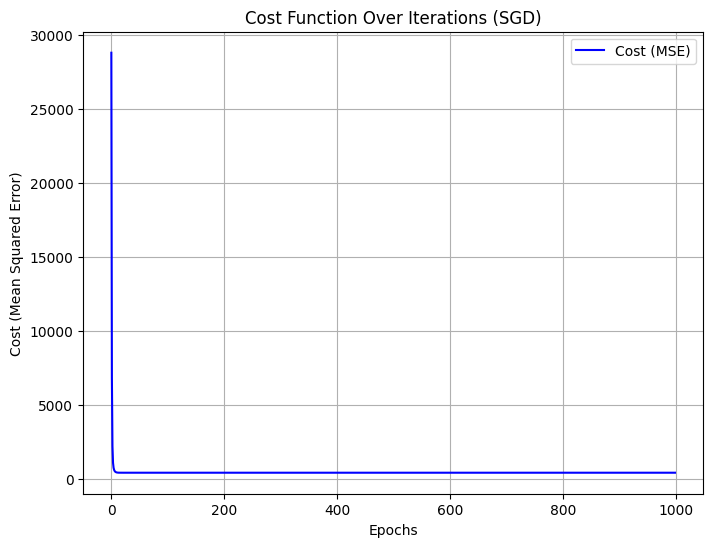

Final Mean Squared Error on Test Data: 523.3721
Final Coefficients (Weights): [114.48387955 -18.99487602 -32.44815442 -38.21547337]
Final Intercept (Bias): [360.82136237]


In [11]:
# Step 4: Initialize the model using stochastic gradient descent
sgd_reg = SGDRegressor(max_iter=1, tol=None, learning_rate='constant', eta0=0.01, random_state=42)

# Step 5: Track the cost (mean squared error) at each iteration
n_epochs = 1000
m = len(X_train_scaled)
cost_history = []

# Use partial_fit to perform manual iterations
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_scaled, y_train)  # partial_fit updates the model incrementally
    y_train_predict = sgd_reg.predict(X_train_scaled)
    mse = mean_squared_error(y_train, y_train_predict)
    cost_history.append(mse)

# Step 6: Plot the cost function history
plt.figure(figsize=(8, 6))
plt.plot(range(n_epochs), cost_history, 'b-', label='Cost (MSE)')
plt.title('Cost Function Over Iterations (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Mean Squared Error)')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Evaluate the model on the test set
y_pred = sgd_reg.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred)
print(f"Final Mean Squared Error on Test Data: {mse_test:.4f}")
print("Final Coefficients (Weights):", sgd_reg.coef_)
print("Final Intercept (Bias):", sgd_reg.intercept_)

In [ ]:
# Prediction with input value:

# 1200 sqft, 3 bedrooms, 1 floor, 40 years old
# x_house = np.array([1200, 3, 1, 40])  # Example house data with 4 features
#x_house = np.array(X_test[5])
x_house = np.array([3000, 2, 1, 80])
print('Predicted value: ', x_house)
x_house_scaled = scaler.transform([x_house])  # Scale the input using the same scaler

# Predict the house price using the trained model
y_house_pred = sgd_reg.predict(x_house_scaled)

# Assuming the prediction is stored in y_house_pred
print(f"Predicted price of the house with {x_house[0]} sqft, {int(x_house[1])} bedrooms, {int(x_house[2])} floor, {x_house[3]} years old = ${y_house_pred[0] * 1000:.2f}")


Predicted value:  [1200    3    5    1]
Predicted price of the house with 1200 sqft, 3 bedrooms, 5 floor, 1 years old = $110021.15
